In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from networkx.algorithms import bipartite
import numpy as np

In [2]:
business_df = pd.read_json('business.json', lines=True)
# business_df.head()

In [3]:
tip_df = pd.read_json('tip.json', lines=True)
#tip_df.head()

In [4]:
# business_df['categories'].value_counts().head(60)

In [5]:
# business_df[['address', 'categories', 'city', 'name', 'postal_code', 'review_count', 'stars', 'state']]

In [5]:
cityisMontreal = business_df['city']=='MontrÃ©al'
#print(cityisMontreal.head())

In [6]:
MontrealBusiness = business_df[cityisMontreal]
#MontrealBusiness.head()

In [8]:
# MontrealBusiness.shape

In [7]:
MontrealBusiness.city = MontrealBusiness.city.replace({'MontrÃ©al':'Montreal'})
# MontrealBusiness.tail(100)

In [8]:
MontrealBusiness=MontrealBusiness[["attributes", 'categories', 'city', 'name', 'review_count','stars', 'business_id', 'longitude', 'latitude']]
#MontrealBusiness.head()

In [13]:
# MontrealBusiness.head()

In [14]:
# MontrealBusiness['categories'].value_counts().head(80)

In [9]:
MontrealBusiness_Coffee = MontrealBusiness[MontrealBusiness['categories'].isin(['Coffee & Tea, Food', 'Food, Coffee & Tea', 'Cafes, Restaurants', 'Restaurants, Cafes'])]
# MontrealBusiness_Coffee.head(60)
#MontrealBusiness_Coffee.shape


In [16]:
# MontrealBusiness_Coffee.groupby('name').stars.mean()

In [17]:
# MontrealBusiness_Coffee.shape

In [10]:
best = MontrealBusiness_Coffee['stars'] >=4.0

In [19]:
# print(best)

In [11]:
Best_Coffee = MontrealBusiness_Coffee[MontrealBusiness_Coffee.stars >= 4.0]

In [12]:
Best_Coffee.sort_values(by = ['stars'], inplace=True, ascending=False)
# Best_Coffee.head(60)

In [13]:
# Best_Coffee.groupby('stars').review_count.mean()

In [14]:
Better_Coffee = Best_Coffee[Best_Coffee.review_count >= 10.0]
#Better_Coffee.head()

In [15]:
# Better_Coffee.head(60)

In [16]:
user = pd.read_json('user.json', lines=True)

In [17]:
user.drop(['compliment_cool', 'compliment_cute', 'compliment_funny', 'compliment_hot', 'compliment_list', 'compliment_more', 'compliment_note', 'compliment_photos', 'compliment_plain', 'compliment_profile', 'compliment_writer', 'funny', 'yelping_since'], axis=1, inplace=True)

In [18]:
user_elite_title = user[user.elite.str.contains('2018')]

In [19]:
#user_elite_title.head(60)

In [21]:
bizz_tips = Better_Coffee.merge(tip_df, on='business_id', how='inner', indicator=True)
#bizz_tips


In [22]:
bizz_tips_use = bizz_tips.merge(user_elite_title, on='user_id', how='inner')
#bizz_tips_use

In [23]:
bizz_tips_use.rename(columns={'name_x':'bizz_name','name_y':'user_name','review_count_x':'bizz_review_count', 'review_count_y':'user_review_count'}, inplace=True) 
bizz_tips_use = bizz_tips_use[['business_id','bizz_name','longitude','latitude','bizz_review_count','stars','user_id','user_name','user_review_count','useful','elite','text']]
#bizz_tips_use.columns


In [24]:
#bizz_tips_use.head()

In [25]:
bizz_tips_use['influence'] = ((bizz_tips_use.useful / bizz_tips_use.user_review_count))

In [26]:
#bizz_tips_use.head()

In [58]:
bizz_tips_use.sort_values(by = ['influence'], inplace=True, ascending=False)
bizz_tips_use

,business_id,bizz_name,longitude,latitude,bizz_review_count,stars,user_id,user_name,user_review_count,useful,elite,text,influence
9,NzLwCjZKriWw3n8RNZwRKA,MELK Bar Ã CafÃ©,-73.622689,45.475294,51,4.5,pn_flI3EBNugBEYFp9okxQ,Colanie,536,10108,"2016,2017,2018",Hidden by construction. Go up middle ramp turn...,18.858209
10,NzLwCjZKriWw3n8RNZwRKA,MELK Bar Ã CafÃ©,-73.622689,45.475294,51,4.5,pn_flI3EBNugBEYFp9okxQ,Colanie,536,10108,"2016,2017,2018","Get the brownie cookie, more cakey than chewy ...",18.858209
43,A0neyJHiOUqhKVhrURCEfA,Second Cup,-73.573566,45.509432,24,4.0,ooHF-vRzlkyN9UEVMKocAQ,Mercedes,752,10465,"2015,2016,2017,2018",Second Cup Served Its Purpose To Be Opened Til...,13.916223
40,v11nL8xtY2ZPP8ADyPectQ,CafÃ© Plume,-73.587934,45.518711,54,4.0,dK4m2dTVJM-XqWSPL91Q5Q,Gabriel,351,3359,"2013,2014,2015,2016,2017,2018",Beans from Santa Cruz! Who would have thought!,9.569801
58,nIroO3-n_GqxlUMvhNjxEQ,Le Couteau,-73.584397,45.524874,41,4.0,GHoG4X4FY8D8L563zzPX5w,Hannah,3956,28051,"2013,2014,2015,2016,2017,2018",Look for the knife sign,7.090748
57,nIroO3-n_GqxlUMvhNjxEQ,Le Couteau,-73.584397,45.524874,41,4.0,GHoG4X4FY8D8L563zzPX5w,Hannah,3956,28051,"2013,2014,2015,2016,2017,2018",Free wifi,7.090748
14,pkO54EbPl6E57Q0yu2XYRA,Cafe Myriade,-73.577898,45.496102,189,4.5,bUPeHBFEINhqiKj9-k4-zA,Charles,82,573,"2013,2014,2015,2016,2017,2018",Nice caramel touch to LattÃ©!,6.987805
17,v11nL8xtY2ZPP8ADyPectQ,CafÃ© Plume,-73.587934,45.518711,54,4.0,bUPeHBFEINhqiKj9-k4-zA,Charles,82,573,"2013,2014,2015,2016,2017,2018",Oh they carry Fernwood beans now!,6.987805
18,A0neyJHiOUqhKVhrURCEfA,Second Cup,-73.573566,45.509432,24,4.0,bUPeHBFEINhqiKj9-k4-zA,Charles,82,573,"2013,2014,2015,2016,2017,2018",Great place to hangout for coffee and wifi acc...,6.987805
19,8WQZjkDWV3P-ZuF8BDEi0w,Lapin PressÃ©,-73.584204,45.533172,33,4.0,bUPeHBFEINhqiKj9-k4-zA,Charles,82,573,"2013,2014,2015,2016,2017,2018",Excellent coffee shop to chill out on Saturday...,6.987805


In [28]:
#bizz_tips_use['bizz_name'].value_counts().head(60)

In [29]:
# bizz_tips_use['user_id'].value_counts().head(80)
#bizz_tips_use['latitude'].value_counts().head(80)

In [30]:
#bizz_tips_use.user_id

In [31]:
#bizz_tips_use.isnull().sum()

In [64]:
user = set(bizz_tips_use.user_name)

In [65]:
cafe = set(bizz_tips_use.bizz_name)

In [34]:
# cafe

In [35]:
# user

In [36]:
sim = nx.DiGraph()

In [66]:
sim.add_nodes_from(user, bipartite='user_name')

In [67]:
sim.add_nodes_from(cafe, bipartite='bizz_name')

In [68]:
templist = tuple(zip(bizz_tips_use.user_name, bizz_tips_use.bizz_name))
#templist

In [69]:
sim.add_edges_from(templist)

In [41]:
#print(nx.info(sim))

In [42]:
#bipartite.is_bipartite(sim)

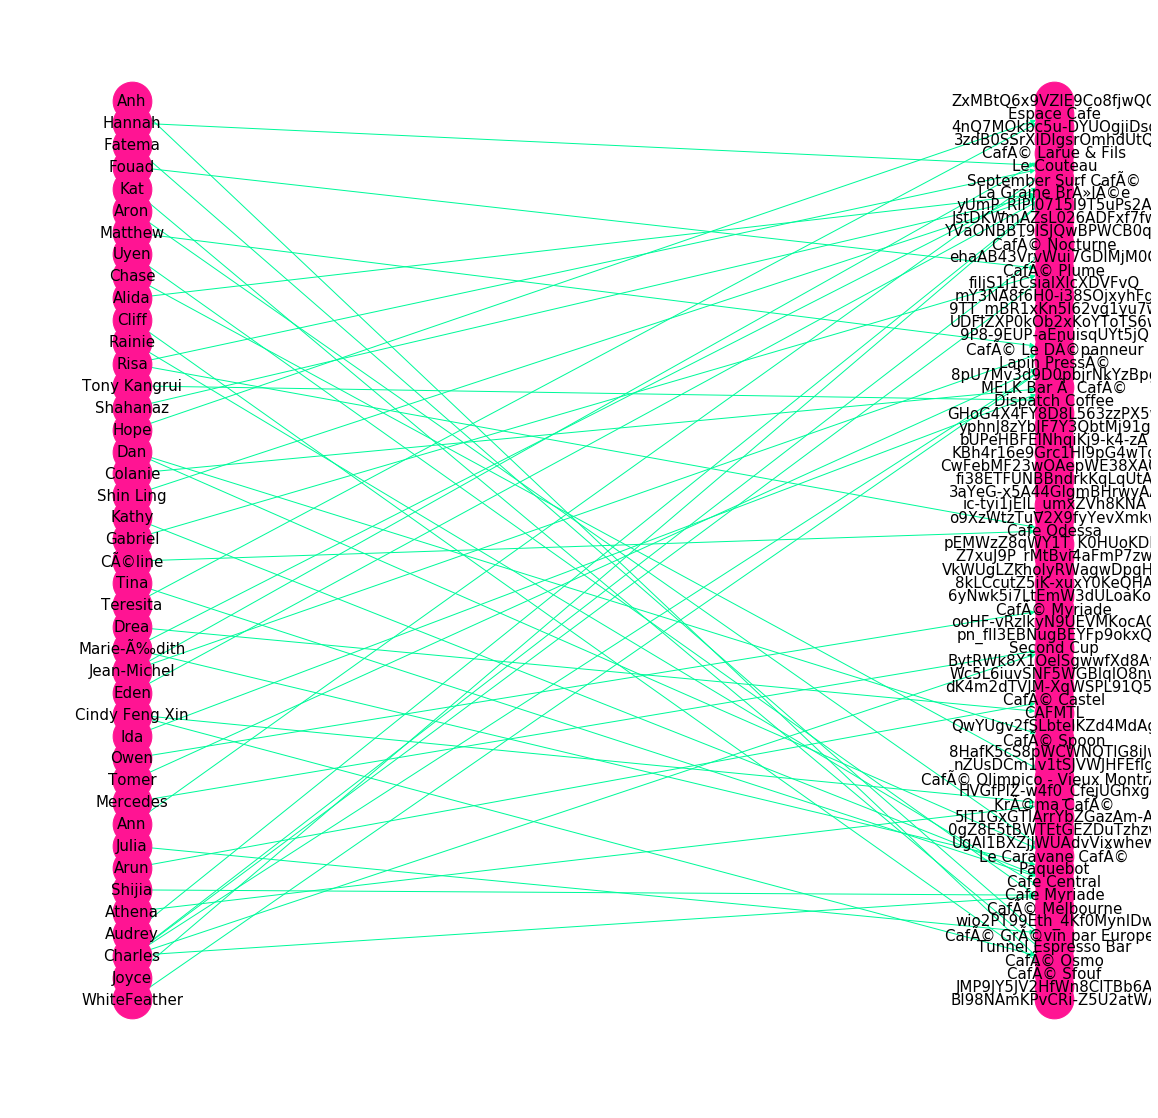

In [73]:
# plt.figure(figsize = (20,20))
# pos = nx.bipartite_layout(sim, user, scale = 50)
# nx.draw_networkx(sim, pos, node_color='deeppink', node_size = 1500, node_shape = 'o', edge_color='mediumspringgreen', font_size=15, font_color='black')
# plt.axis('off')
# plt.show()

In [45]:
#function to make recomendations based on similarity
def rec_cafe(sim, user1, user2):
    if sim.node[user1]['bipartite'] == sim.node[user2]['bipartite']:
        nbrs1 = sim.neighbors(user1)
        nbrs2 = sim.neighbors(user2)
        difference = set(nbrs1).difference(nbrs2)
        return difference

In [46]:
#print(rec_cafe(sim, 'pn_flI3EBNugBEYFp9okxQ', '4nQ7MOkbc5u-DYUOgjiDsg'))

In [50]:
#nx.degree_centrality(sim)

In [48]:
#nx.closeness_centrality(sim)

In [49]:
# plt.scatter(bizz_tips_use.latitude, bizz_tips_use.longitude)
# plt.show

In [103]:
btu = nx.from_pandas_edgelist(bizz_tips_use, "user_name", 'bizz_name', create_using = nx.Graph())

In [104]:
btu.add_node(bizz_tips_use.user_name, role="influencer")

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [76]:
print(nx.info(btu))

Name: 
Type: Graph
Number of nodes: 70
Number of edges: 51
Average degree:   1.4571


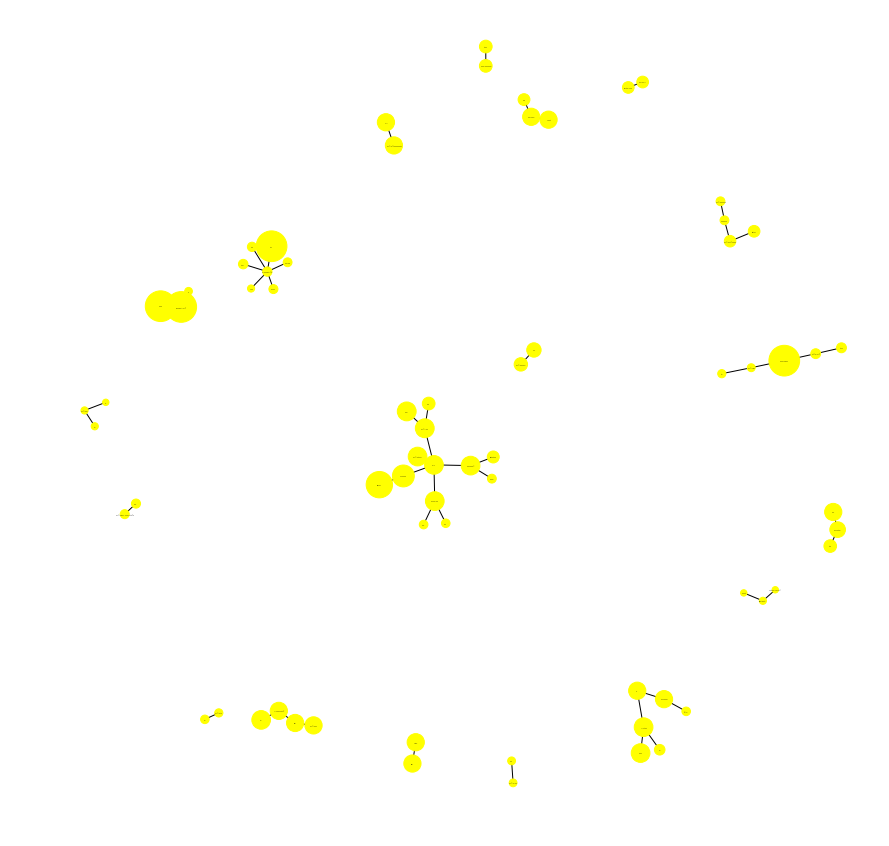

In [102]:
plt.figure(figsize = (15,15))
nx.draw_networkx(btu, node_color = 'yellow', node_size = 50*(bizz_tips_use.influence), node_shape = 'o', edge_color='black', font_size=0,font_color='black') 
plt.axis('off')
plt.show()

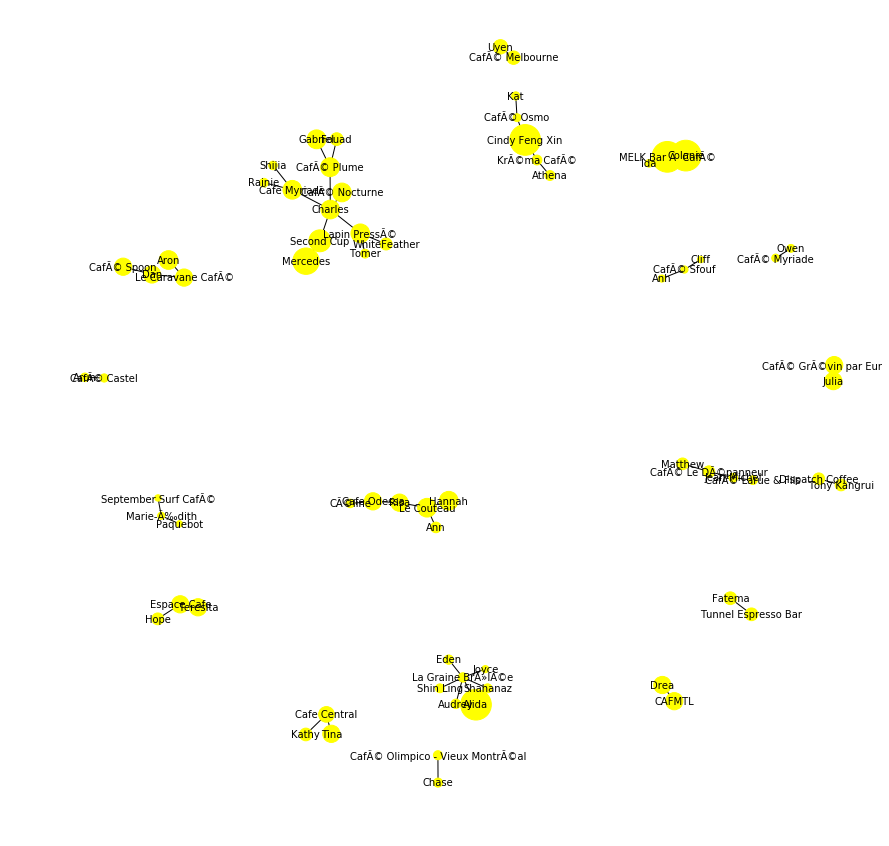

In [101]:
plt.figure(figsize = (15,15))
nx.draw_networkx(btu, node_color = 'yellow', node_size =50*(bizz_tips_use.influence), node_shape = 'o', edge_color='black', font_size=10,font_color='black') 
plt.axis('off')
plt.show()

In [ ]:
btu = graph.weighted_projected_graph

In [86]:
nx.degree_centrality(btu)

{'Colanie': 0.014492753623188406,
 'MELK Bar Ã\xa0 CafÃ©': 0.028985507246376812,
 'Mercedes': 0.014492753623188406,
 'Second Cup': 0.028985507246376812,
 'Gabriel': 0.014492753623188406,
 'CafÃ© Plume': 0.043478260869565216,
 'Hannah': 0.014492753623188406,
 'Le Couteau': 0.043478260869565216,
 'Charles': 0.07246376811594203,
 'Cafe Myriade': 0.043478260869565216,
 'Lapin PressÃ©': 0.043478260869565216,
 'CafÃ© Nocturne': 0.014492753623188406,
 'Aron': 0.014492753623188406,
 'Le Caravane CafÃ©': 0.028985507246376812,
 'Risa': 0.028985507246376812,
 'Cafe Odessa': 0.028985507246376812,
 'Teresita': 0.014492753623188406,
 'Espace Cafe': 0.028985507246376812,
 'Julia': 0.014492753623188406,
 'CafÃ© GrÃ©vin par Europea': 0.014492753623188406,
 'Drea': 0.014492753623188406,
 'CAFMTL': 0.014492753623188406,
 'Dan': 0.028985507246376812,
 'CafÃ© Spoon': 0.014492753623188406,
 'Tina': 0.014492753623188406,
 'Cafe Central': 0.028985507246376812,
 'Uyen': 0.014492753623188406,
 'CafÃ© Melbourne'

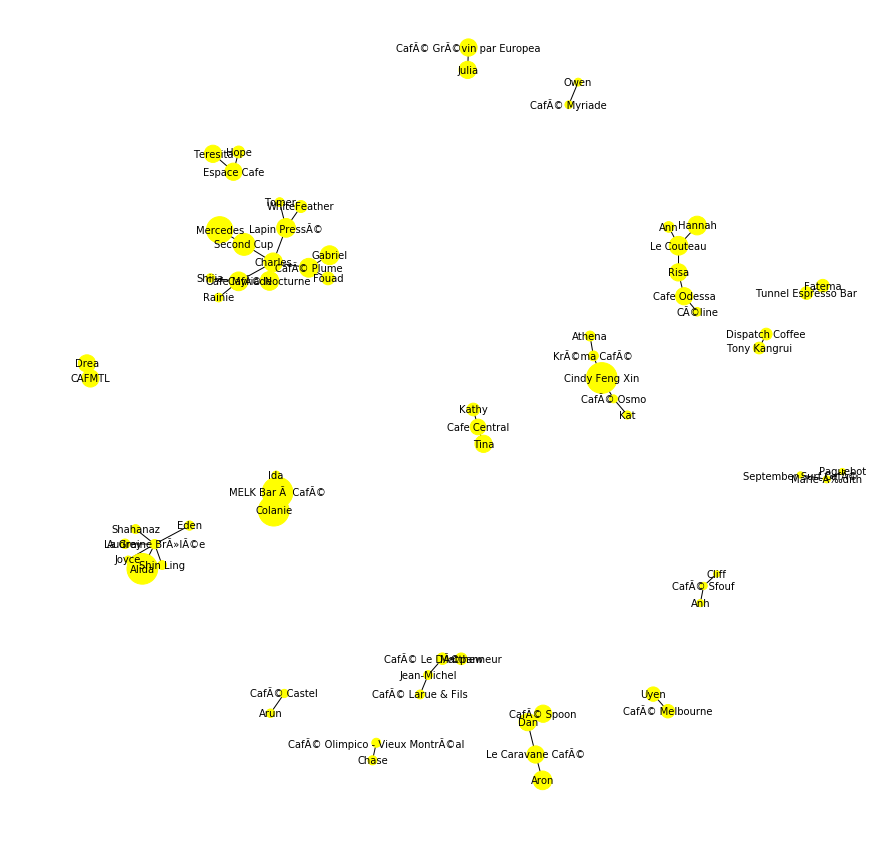

In [98]:
plt.figure(figsize = (15,15))
nx.draw_networkx(btu, node_color = 'yellow', node_size = 50*(bizz_tips_use.influence), node_shape = 'o', edge_color='black', font_size=10,font_color='black') 
plt.axis('off')
plt.show()